# IMMOWEB PROJECT: EXPLORATORY DATA ANALYSIS

## LIBRARIES AND SETTINGS

In [ ]:
# Set the notebook to show all outputs in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#from ydata_profiling import ProfileReport

# This is for reading the locality name properly. In avoiding the encoding error
import csv
import os

import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Pandas options for data wrangling and output set-up 
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.expand_frame_repr', False) # print all columns and in the same line
pd.set_option('display.max_colwidth', None) # display the full content of each cell
pd.set_option('display.float_format', lambda x: '%.2f' %x) # floats to be displayed with 2 decimal places

# Visualisation libraries and set-up
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Set up visualisation preferences
plt.rcParams['font.family'] = "serif"  # Use serif fonts for plots
sns.set_style('whitegrid')  # Set seaborn grid style
# sns.set_style('darkgrid')

## START OF ANALYSIS: LOAD DATA & CLEAN THE VARIABLES

In [ ]:
# Split the variables into numerical and categorical cols, as different actions to be take for each variable type
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

categoric_cols = df.select_dtypes(exclude=np.number).columns
categoric_cols

# THINGS TO DO
Variables coded 0/1 are not numeric, should be category  
postCode also category  
improve Plot_numeric(i) to show as well the count of values below lower limit and upper limit  
decide what to do with outliers  

There are numeric variables that show as category as we added value "No info", plot excluding category == No info

Look at correlation

Answer the questions using plots

DATASET OVERVIEW
Total rows: 76,370
Total columns: 24

Qualitative variables: 16
Quantitative variables: 8

MISSING VALUES ANALYSIS
               Column  Missing Count  Percentage
14        kitchenType          34458   45.119811
12      floodZoneType          33466   43.820872
19        toiletCount          21280   27.864345
13        heatingType          20345   26.640042
10  buildingCondition          18381   24.068351
22           epcScore          11987   15.695954
7    habitableSurface           8590   11.247872
3       bathroomCount           7570    9.912269
2        bedroomCount           1952    2.555977


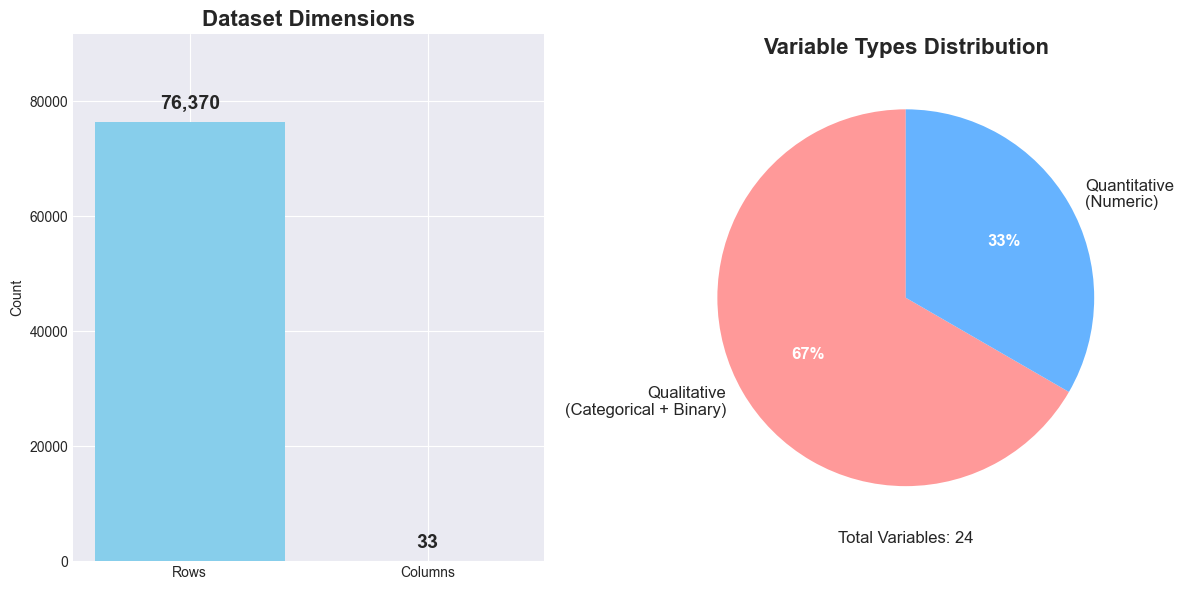

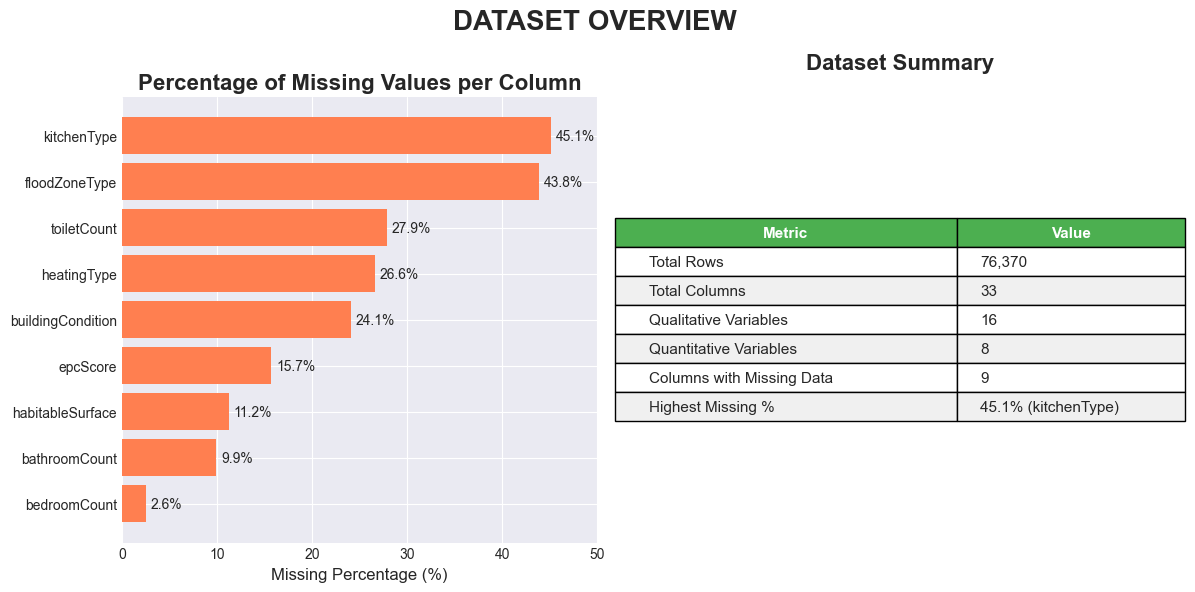

NameError: name 'original_cols' is not defined

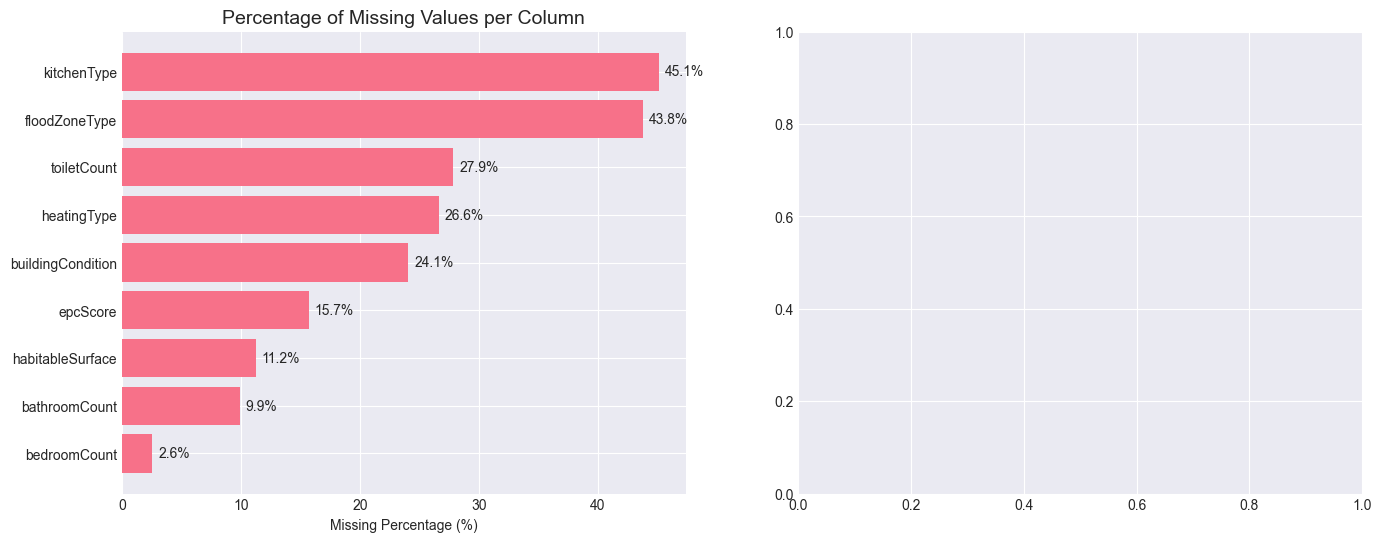

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# Load the dataset
df = pd.read_csv('Data/Cleaned - immoweb-dataset.csv')

# Split the variables into numerical and categorical cols, as different actions to be take for each variable type
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

categoric_cols = df.select_dtypes(exclude=np.number).columns
categoric_cols

# define variable types
binary_vars = ['hasAttic', 'hasBasement', 'hasGarden', 'hasSwimmingPool', 'hasTerrace']
categorical_vars = ['type','subtype', 'region', 'province', 'postCode','buildingCondition', 
                   'floodZoneType', 'heatingType', 'kitchenType', 'epcScore', 'hasLift']
numeric_vars = ['bedroomCount', 'bathroomCount', 'habitableSurface', 'landSurface',
                'parkingCountIndoor', 'parkingCountOutdoor', 'toiletCount', 'price']

#convert bibary vars to categorical
for var in binary_vars:
    df[var]=df[var].astype('category')

#convert postcode to categorical
df["postCode"] = df["postCode"].astype("category")

#convert haslift to categorical if it's boolean
if df['hasLift'].dtype == 'bool':
    df['hasLift'] = df['hasLift'].astype('categoty')

# rows and columns, qualitative and quantitative variables 
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nQualitative variables: {len(categorical_vars) + len(binary_vars)}")
print(f"Quantitative variables: {len(numeric_vars)}")


# function to handle "No Info" values
def clean_numeric_column(df,col):
    #convert conlumn to numeric, treating "No Info" as "NaN"
    df_copy = df.copy()
    df_copy[col] = pd.to_numeric(df_copy[col],errors='coerce')
    return df_copy[col]


#clean numeric columns
for col in numeric_cols:
    if df[col].dtype == "object":
        df[f"{col}_clean"] = clean_numeric_column(df,col)
    else:
        df[f"{col}_clean"] = df[col]


# Percentage of missing values per column
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_data = []
for col in df.columns:
    if col.endswith('_clean'):
        continue
    null_count = df[col].isnull().sum()
    no_info_count = (df[col] == 'No info').sum() if df[col].dtype == 'object' else 0
    total_missing = null_count + no_info_count
    percentage = (total_missing / len(df)) * 100
    missing_data.append({
        'Column': col,
        'Missing Count': total_missing,
        'Percentage': percentage
    })

missing_df = pd.DataFrame(missing_data).sort_values('Percentage', ascending=False)
print(missing_df[missing_df['Percentage'] > 0].to_string())



#=============================================================visualization========================================================================


# =====Visualization 1: Dataset Overview with 2 subplots=====
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

    # 1. Dataset dimensions (rows and columns)
dims_data = ['Rows', 'Columns'] # the labels representing the dataset's dimensions: the number of rows and the number of columns.
dims_values = [len(df), len(df.columns)] #values(rows,columns)
bars1 = ax1.bar(dims_data, dims_values, color=['skyblue', 'lightcoral'])
ax1.set_title('Dataset Dimensions', fontsize=16, fontweight='bold') #setting title
ax1.set_ylabel('Count') # y lable name

    # Add value labels on top of bars
for bar, val in zip(bars1, dims_values):
    ax1.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + max(dims_values)*0.02,
             f'{val:,}', ha='center', va='bottom',
             fontsize=14, fontweight='bold')

ax1.set_ylim(0, max(dims_values) * 1.2)

    # 2. Variable type distribution (Qualitative vs Quantitative)
var_types = ['Qualitative\n(Categorical + Binary)', 'Quantitative\n(Numeric)']
var_counts = [len(categorical_vars) + len(binary_vars), len(numeric_vars)]
colors =['#ff9999', '#66b3ff']
    # Draw a pie chart to show the distribution of variable types (qualitative vs quantitative)
wedges, texts, autotexts = ax2.pie(
    var_counts,                 # A list of counts, e.g. [10, 5] for two categories
    labels=var_types,           # Labels for each slice, e.g. ['Qualitative', 'Quantitative']
    colors=colors,              # Colors assigned to each slice
    autopct='%1.0f%%',          # Automatically show percentage labels with no decimal places (e.g. 60%)
    startangle=90,              # Start drawing the pie from the top (90 degrees)
    textprops={'fontsize': 12}  # Font size for all text labels on the pie
)

    # Explanation of returned values:
    # - wedges: the pie slices (used for styling or custom interaction)
    # - texts: the category labels placed around the pie
    # - autotexts: the percentage values placed inside the slices

    # Customize the percentage labels inside the pie
for autotext in autotexts:
    autotext.set_color('white')        # Set the font color of percentage text to white
    autotext.set_fontweight('bold')    # Make the percentage text bold

    # Set the title for the pie chart
ax2.set_title('Variable Types Distribution', fontsize=16, fontweight='bold')

    # Add a note below the pie chart indicating total number of variables
ax2.text(0, -1.3, 
    f'Total Variables: {sum(var_counts)}', 
    ha='center', 
    fontsize=12)

    # Adjust layout
plt.tight_layout()
plt.show()


# =========== Visualization 2: Missing values plot ===============
# 3. Missing values percentage bar chart

fig,(ax3, ax4) = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

missing_sorted = missing_df[missing_df['Percentage'] > 0].sort_values('Percentage', ascending=True)
bars3 = ax3.barh(missing_sorted['Column'], missing_sorted['Percentage'], color='coral')
ax3.set_xlabel('Missing Percentage (%)', fontsize=12)
ax3.set_title('Percentage of Missing Values per Column', fontsize=16, fontweight='bold')
ax3.set_xlim(0, 50)
for i, (bar, pct) in enumerate(zip(bars3, missing_sorted['Percentage'])):
    ax3.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f'{pct:.1f}%', ha='left', va='center', fontsize=10)

# 4. Summary statistics table
summary_data = [
    ['Total Rows', f'{len(df):,}'],
    ['Total Columns', f'{len(df.columns)}'],
    ['Qualitative Variables', f'{len(categorical_vars) + len(binary_vars)}'],
    ['Quantitative Variables', f'{len(numeric_vars)}'],
    ['Columns with Missing Data', f'{len(missing_sorted)}'],
    ['Highest Missing %', f'{missing_sorted["Percentage"].max():.1f}% ({missing_sorted.iloc[-1]["Column"]})']
]

ax4.axis('tight')
ax4.axis('off')
table = ax4.table(cellText=summary_data, 
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.2, 1.8)
ax4.set_title('Dataset Summary', fontsize=16, fontweight='bold', pad=20)

# Style the table
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#4CAF50')
        cell.set_text_props(weight='bold', color='white')
    else:
        cell.set_facecolor('#f0f0f0' if i % 2 == 0 else 'white')

plt.suptitle('DATASET OVERVIEW', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

# Visualization 2: Missing Values Bar Chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Horizontal bar chart
missing_sorted = missing_df[missing_df['Percentage'] > 0].sort_values('Percentage')
bars = ax1.barh(missing_sorted['Column'], missing_sorted['Percentage'])
ax1.set_xlabel('Missing Percentage (%)')
ax1.set_title('Percentage of Missing Values per Column', fontsize=14)
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{width:.1f}%', ha='left', va='center')

# Right plot: Missing values pattern
# Calculate percentage of missing values per column for visualization
missing_percentages = []
for col in original_cols:
    if df[col].dtype == 'object':
        missing_pct = ((df[col].isnull() | (df[col] == 'No info')).sum() / len(df)) * 100
    else:
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
    missing_percentages.append(missing_pct)

# Create a matrix showing missing percentage
missing_pct_matrix = np.array(missing_percentages).reshape(-1, 1)
im = ax2.imshow(missing_pct_matrix, cmap='RdYlGn_r', aspect='auto', vmin=0, vmax=100)

# Set labels
ax2.set_yticks(range(len(original_cols)))
ax2.set_yticklabels(original_cols)
ax2.set_xticks([0])
ax2.set_xticklabels(['Missing %'])
ax2.set_title('Missing Values Percentage by Column', fontsize=14)

# Add colorbar
cbar = plt.colorbar(im, ax=ax2)
cbar.set_label('Missing Percentage (%)')

# Add text annotations
for i, pct in enumerate(missing_percentages):
    if pct > 0:
        ax2.text(0, i, f'{pct:.1f}%', ha='center', va='center',
                color='white' if pct > 50 else 'black', fontweight='bold')

plt.tight_layout()
plt.show()


# ===========Visualization 3: Missing values bar chart===============



In [5]:
categorical_vars

['type',
 'subtype',
 'region',
 'province',
 'postCode',
 'buildingCondition',
 'floodZoneType',
 'heatingType',
 'kitchenType',
 'epcScore',
 'hasLift']

In [6]:
binary_vars

['hasAttic', 'hasBasement', 'hasGarden', 'hasSwimmingPool', 'hasTerrace']

In [7]:
numeric_vars

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'landSurface',
 'parkingCountIndoor',
 'parkingCountOutdoor',
 'toiletCount',
 'price']

In [ ]:
print(df[numeric_vars].dtypes)

bedroomCount            object
bathroomCount           object
habitableSurface        object
landSurface             object
parkingCountIndoor     float64
parkingCountOutdoor    float64
toiletCount             object
price                  float64
dtype: object


In [64]:
def corPlot(df):
    """ 
    Function to plot the correlation of numeric variables
    """

    # Compute correlation
    correlations = df.corr()['price'].drop('price').sort_values(ascending=False)


    # Plot
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
    plt.title('Correlation of Numeric Variables Against Price', fontsize=16, fontweight='bold')
    plt.xlabel('Pearson Correlation Coefficient')
    plt.ylabel('')
    plt.grid(True, axis='x', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


In [65]:
def corMatrix(df):
    """
    Showing a heatmap correlation matrix for all numeric variables pairs
    """

    # Compute correlation matrix
    corr_matrix = df.corr()

    # Plot heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [66]:
def pairPlot(df, features):
    """"
    Function to make a pairplot for all numeric values
    """
    plt.figure(figsize=(6, 5))
    sns.pairplot(df, vars = features + ['price'], diag_kind='kde', corner=True)
    plt.suptitle("Pairplot of Price and Features", fontsize=16, fontweight='bold', y=1.02)
    plt.show()

=== CORRELATION PLOT: ALL DATA - HOUSE - APARTMENT ===


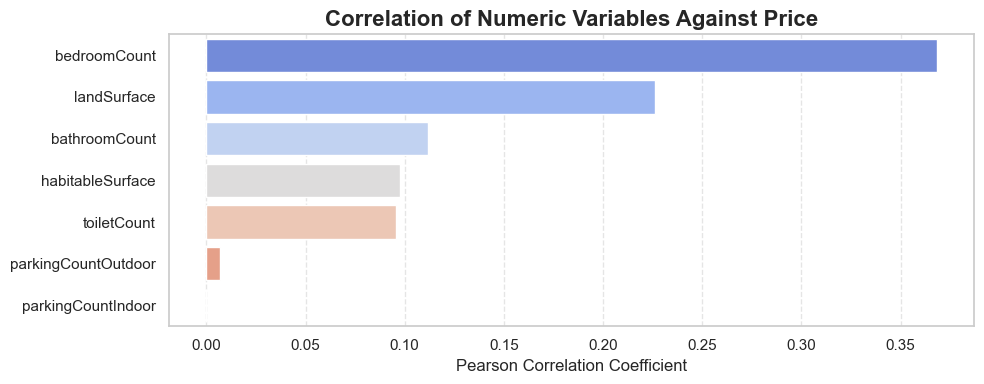

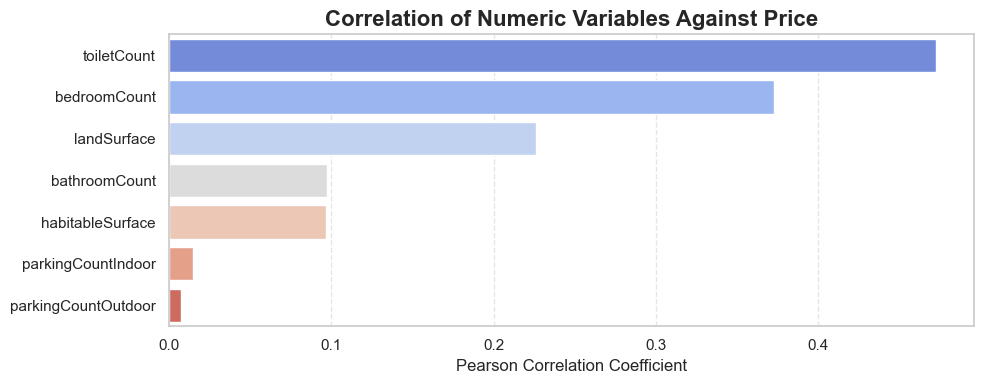

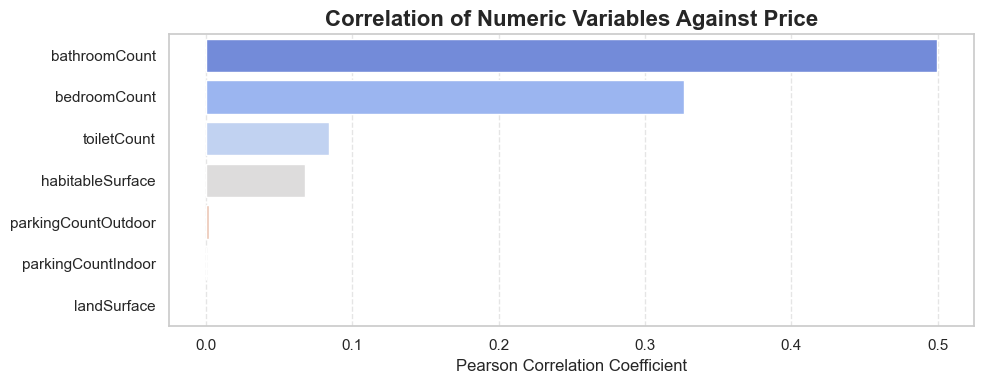

=== CORRELATION MATRIX: ALL DATA - HOUSE - APARTMENT ===


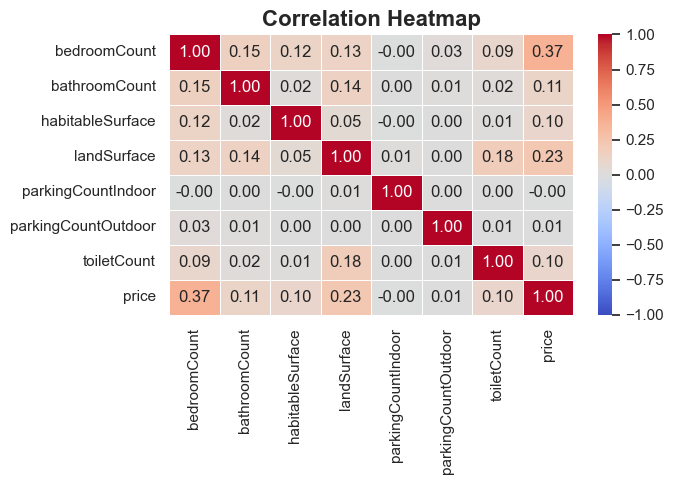

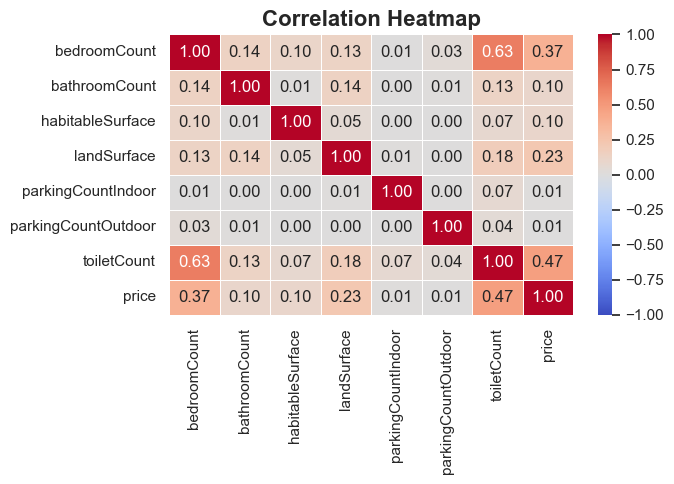

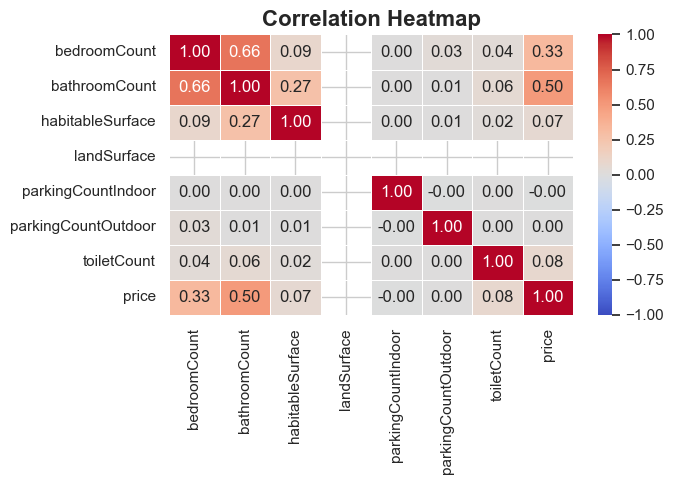

=== PAIRPLOT TOP 3 FEATURES: ALL DATA - HOUSE - APARTMENT ===


<Figure size 600x500 with 0 Axes>

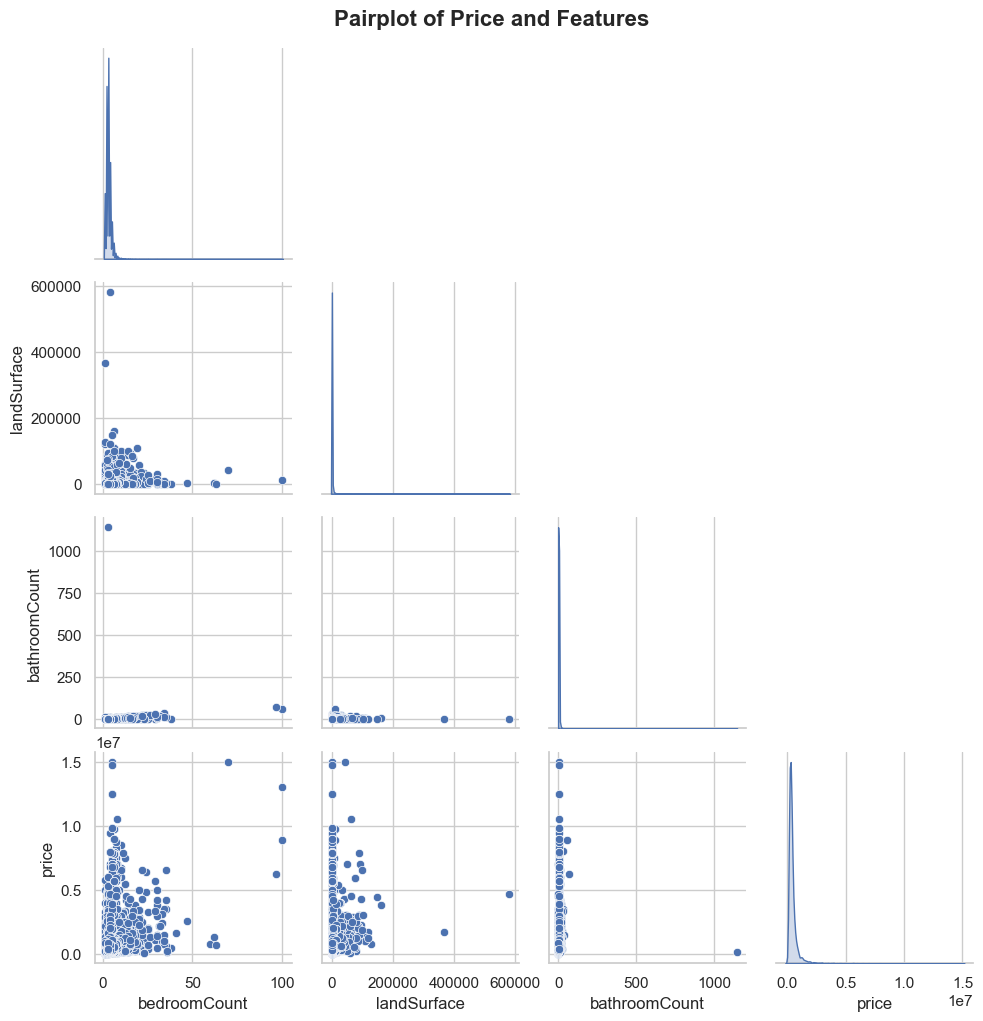

<Figure size 600x500 with 0 Axes>

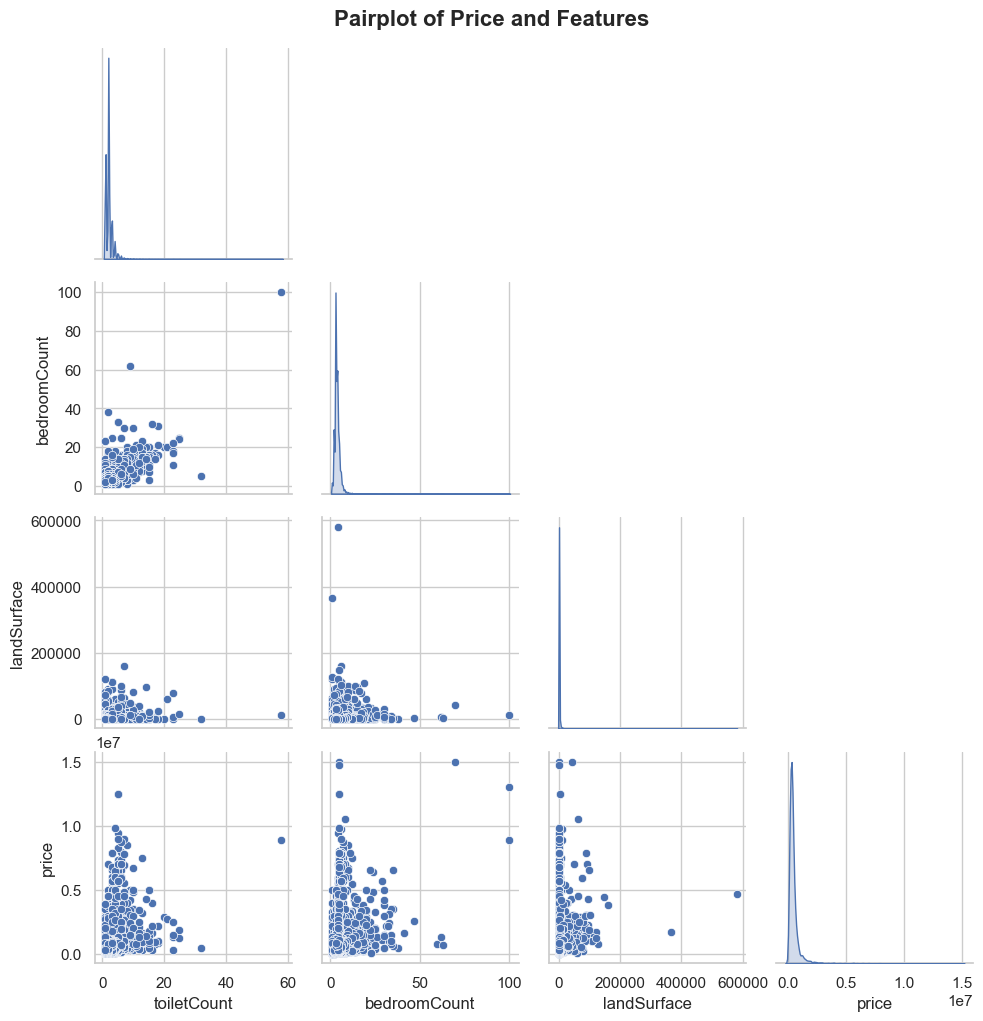

<Figure size 600x500 with 0 Axes>

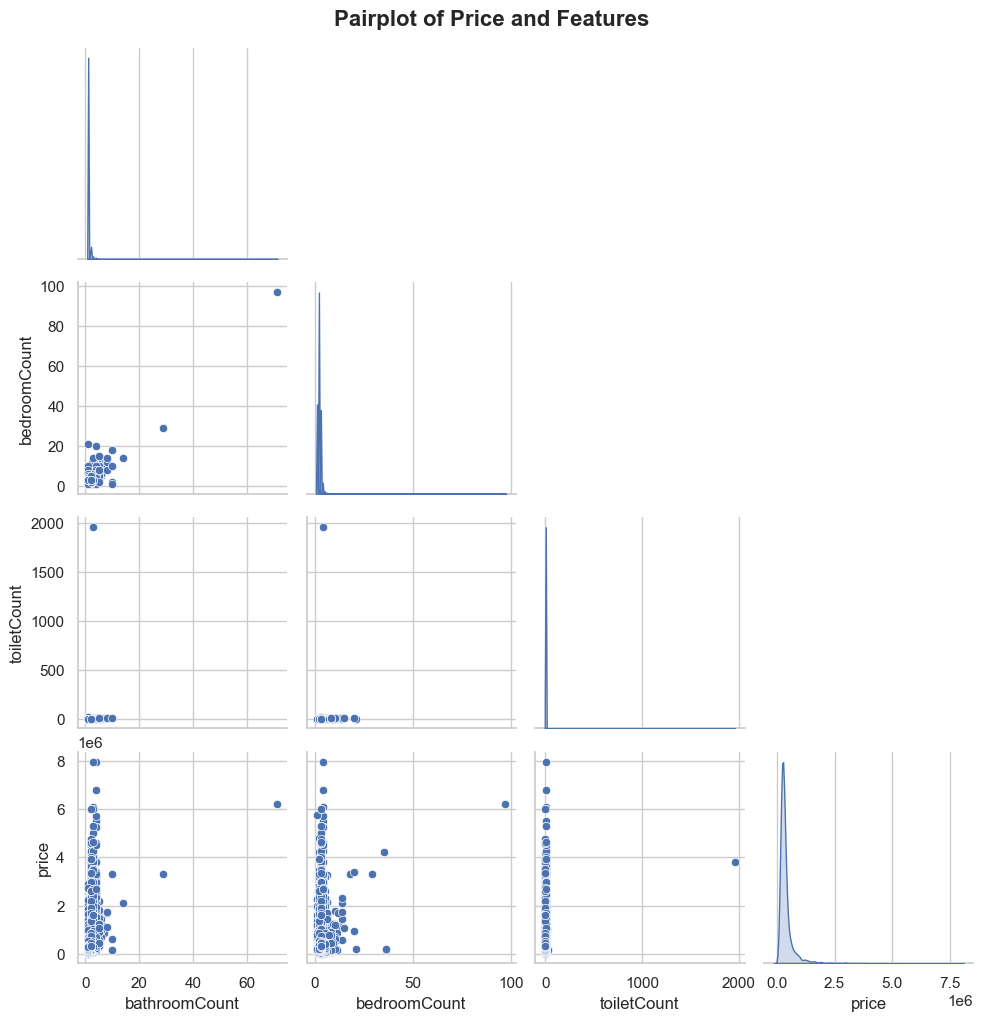

In [68]:
# List of relevant numeric-like columns (including object types)
features = [col for col in numeric_vars if col != 'price']

# Copy the data and convert object columns to numeric (coerce "no info" to NaN)
df_cleaned = df[features + ['price', 'type']].copy()
for col in features:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Create 2 subsets for House and Apartment
df_house = df_cleaned[df_cleaned['type'] == 'House'].copy()
df_apartment = df_cleaned[df_cleaned['type'] == 'Apartment'].copy()

# Drop the type column for each
df_cleaned = df_cleaned.drop(columns=['type'])
df_house = df_house.drop(columns=['type'])
df_apartment = df_apartment.drop(columns=['type'])

print("=== CORRELATION PLOT: ALL DATA - HOUSE - APARTMENT ===")
corPlot(df_cleaned)
corPlot(df_house)
corPlot(df_apartment)

print("=== CORRELATION MATRIX: ALL DATA - HOUSE - APARTMENT ===")
corMatrix(df_cleaned)
corMatrix(df_house)
corMatrix(df_apartment)

print("=== PAIRPLOT TOP 3 FEATURES: ALL DATA - HOUSE - APARTMENT ===")
# Pairplot for only the top 3 most correlated
top3_features = df_cleaned.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_cleaned, top3_features)

top3_house = df_house.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_house, top3_house)

top3_apartment = df_apartment.corr()['price'].drop('price').sort_values(ascending=False).head(3).index.tolist()
pairPlot(df_apartment, top3_apartment)
